In [139]:
#inclui bibliotecas necessarias
library(data.table)
library(ggplot2)

# Pega dados

In [136]:
camara_16 <- fread('https://docs.google.com/spreadsheets/d/1sYrsTe9bRKYq5JPlmkYvjajwcfEb_GEF2welbJoNHec/pub?gid=1741180972&single=true&output=csv')
camara_17 <- fread('https://docs.google.com/spreadsheets/d/1KMAjik1mqwEih2qMZaVbIeS7qkRfoj857_bfpIuKKW8/pub?gid=770186696&single=true&output=csv')
cidade <- fread('https://docs.google.com/spreadsheets/d/1_heqrYfTYjN6iygPPKSgkv2CWXpzoSjYV8mbS7FfW_s/pub?gid=323736055&single=true&output=csv')

# cria data.frame para compilar as informacoes

In [110]:
db <- data.frame(local=character(),
                                 total=numeric(),
                                 homem=numeric(), 
                                 mulher=numeric(), 
                                 branco=numeric(),
                                 nao_branco=numeric(),
                                 stringsAsFactors=FALSE) 

# inclui os dados da cidade no data.frame
## a populacao sem declaracao nao foi incluida

In [111]:
db[1,1]<-"cidade"
db[1,2]<-cidade$valor[1]#total
db[1,3]<-cidade$valor[2]#homem
db[1,4]<-cidade$valor[3]#mulher
db[1,5]<-cidade$valor[5]#brancx
db[1,6]<-cidade$valor[4]+cidade$valor[6]+cidade$valor[7]+cidade$valor[8]#nao brancx

# inclui os dados do mandato 12-16 no dafa.frame

In [112]:
db[2,1]<-"mandato_12_16"
db[2,2]<-nrow(camara_16)#total
db[2,3]<-table(camara_16$Homem)[2]#homem
db[2,4]<-table(camara_16$Homem)[1]#mulher
db[2,5]<-table(camara_16$Branco)[2]#brancx
db[2,6]<-table(camara_16$Branco)[1]#nao brancx

# inclui os dados do mandato 17-20 no dafa.frame

In [113]:
db[3,1]<-"mandato_17_20"
db[3,2]<-nrow(camara_17)#total
db[3,3]<-table(camara_17$Homem)[2]#homem
db[3,4]<-table(camara_17$Homem)[1]#mulher
db[3,5]<-table(camara_17$Branco)[2]#brancx
db[3,6]<-table(camara_17$Branco)[1]#nao brancx

# Cria data.frame de representatividade normalizada

In [132]:
#copia data.frame original
db_norm <-db

In [133]:
#calcula as porcentagens
db_norm$total[1] <- (db$total[1]/db$total[1])*100
db_norm$total[2] <- (db$total[2]/db$total[2])*100
db_norm$total[3] <- (db$total[3]/db$total[3])*100


db_norm$homem[1] <- (db$homem[1]/db$total[1])*100
db_norm$homem[2] <- (db$homem[2]/db$total[2])*100
db_norm$homem[3] <- (db$homem[3]/db$total[3])*100


db_norm$mulher[1] <- (db$mulher[1]/db$total[1])*100
db_norm$mulher[2] <- (db$mulher[2]/db$total[2])*100
db_norm$mulher[3] <- (db$mulher[3]/db$total[3])*100


db_norm$branco[1] <- (db$branco[1]/db$total[1])*100
db_norm$branco[2] <- (db$branco[2]/db$total[2])*100
db_norm$branco[3] <- (db$branco[3]/db$total[3])*100


db_norm$nao_branco[1] <- (db$nao_branco[1]/db$total[1])*100
db_norm$nao_branco[2] <- (db$nao_branco[2]/db$total[2])*100
db_norm$nao_branco[3] <- (db$nao_branco[3]/db$total[3])*100

In [135]:
db

,local,total,homem,mulher,branco,nao_branco
1,cidade,6320446,2959817,3360629,3234812,3084549
2,mandato_12_16,51,45,6,43,8
3,mandato_17_20,51,45,6,44,7


In [134]:
db_norm

,local,total,homem,mulher,branco,nao_branco
1,cidade,100,46.8292427464771,53.1707572535229,51.1801224154118,48.8027110745033
2,mandato_12_16,100,88.2352941176471,11.7647058823529,84.3137254901961,15.6862745098039
3,mandato_17_20,100,88.2352941176471,11.7647058823529,86.2745098039216,13.7254901960784


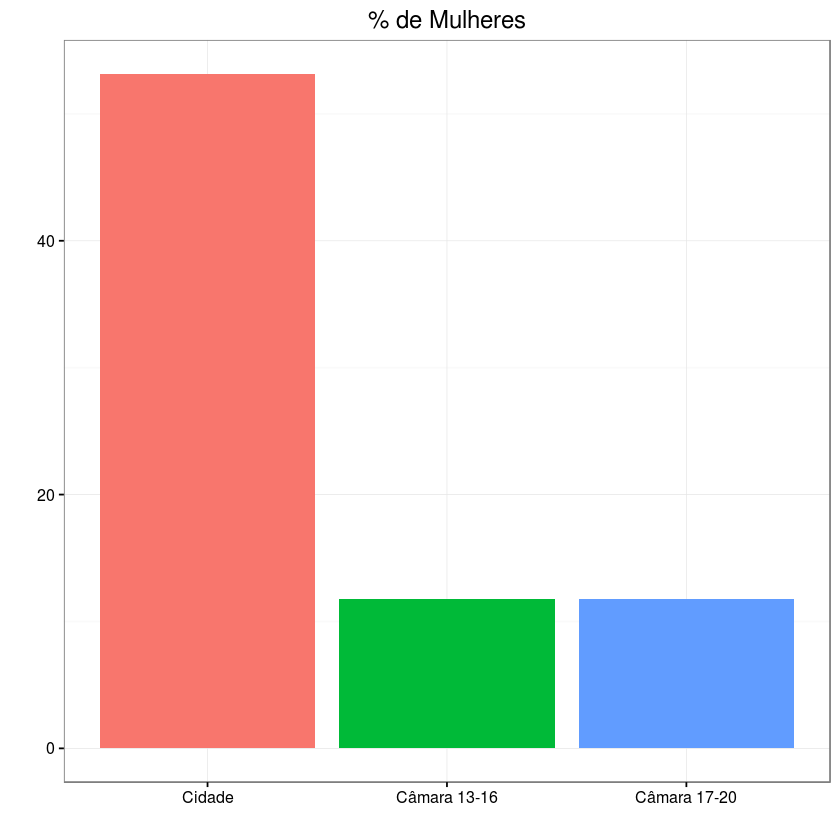

In [162]:
ggplot(db_norm, aes(x=local, y=mulher, fill=local))+geom_bar(stat="identity")+
theme_bw(base_size = 12, base_family = "")+ labs(list(title = "% de Mulheres", x = "", y = ""))+ guides(fill=FALSE)+ 
                    scale_x_discrete(breaks=c("cidade", "mandato_12_16", "mandato_17_20"),
                      labels=c("Cidade", "Câmara 13-16", "Câmara 17-20"))

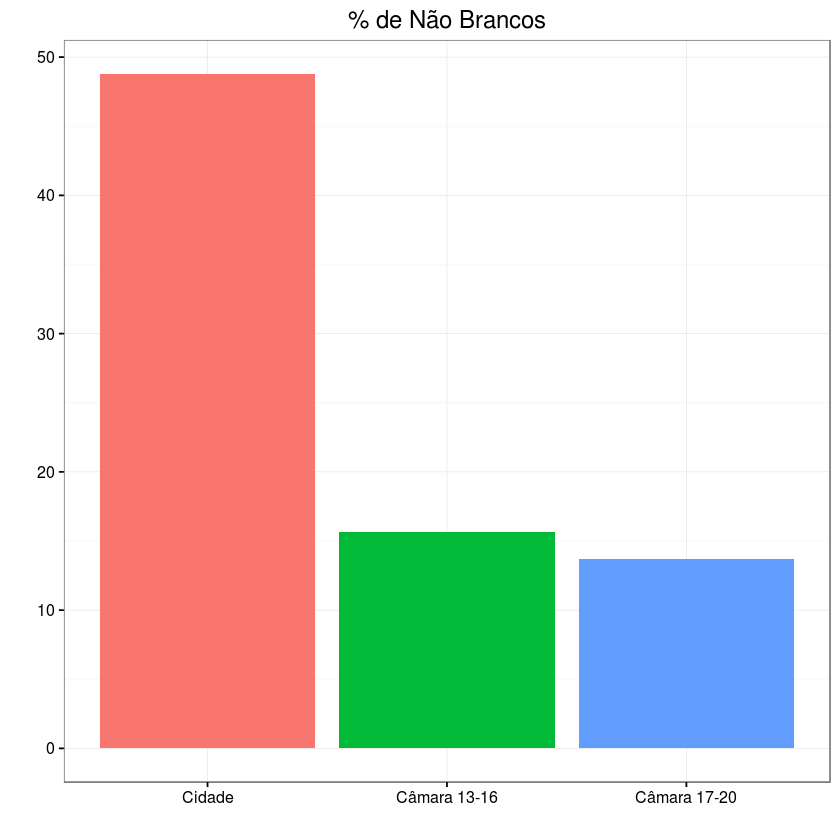

In [163]:
ggplot(db_norm, aes(x=local, y=nao_branco, fill=local))+geom_bar(stat="identity")+
theme_bw(base_size = 12, base_family = "")+ labs(list(title = "% de Não Brancos", x = "", y = ""))+ guides(fill=FALSE)+ 
                    scale_x_discrete(breaks=c("cidade", "mandato_12_16", "mandato_17_20"),
                      labels=c("Cidade", "Câmara 13-16", "Câmara 17-20"))